In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [95]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
DATA_PATH  = '/content/drive/MyDrive/2조_누구냐, 넌!/04. 기타자료/Naver_shopping_크롤링/'

In [41]:
df = pd.read_csv(f"{DATA_PATH}최종통합본.csv")
df

,content,score,date,brand,가격,세정력/거품,향기,트러블/진정,배송/서비스/고객대응,탈모 효과 및 쿨링감,머릿결*
0,배송누락되어 본사확신다고 하시고 다시 주문번호 올려달라고 하시니 대응절차가 문제있어...,1,23.08.31.,라보에이치,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,시원하고 좋은데 뾰루지 많이나고 따갑네요,1,23.09.07.,라보에이치,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,전에 쓰던 샴푸보다 머리카락 더빠짐…,1,23.03.25.,라보에이치,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,저랑은 안맞네요 계속 쓰다보니 두피 너무 가렵고 비듬각질이 생기네요,1,23.02.18.,라보에이치,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,효과는없고 계속많이빠져요,1,22.07.27.,라보에이치,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
90699,아들이 잘 쓰고있어요,5,21.09.18.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90700,써볼께요ㅎㅎ써볼께요,5,21.09.18.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90701,맛있고 배송도 빠르고 넘 넘 좋아요~,5,21.09.17.,닥터그루트,NaN,NaN,NaN,NaN,1.0,NaN,NaN
90702,역시 닥터그루트닙니당,5,21.09.17.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['brand'].unique()

array(['라보에이치', '이지마인드', '보타믹스', '닥터방기원', '살림백서', '앙방', '비어멕', '트리플에스',
       'TS샴푸', '반코르', '닥터그루트'], dtype=object)

In [10]:
라보에이치 = df[df['brand'] == '라보에이치']
이지마인드 = df[df['brand'] == '이지마인드']
닥터방기원 = df[df['brand'] == '닥터방기원']
살림백서 = df[df['brand'] == '살림백서']
앙방 = df[df['brand'] == '앙방']
비어멕 = df[df['brand'] == '비어멕']
트리플에스 = df[df['brand'] == '트리플에스']
TS샴푸 = df[df['brand'] == 'TS샴푸']
반코르 = df[df['brand'] == '반코르']
닥터그루트 = df[df['brand'] == '닥터그루트']

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90704 entries, 0 to 90703
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   content      90704 non-null  object 
 1   score        90704 non-null  int64  
 2   date         90704 non-null  object 
 3   brand        90704 non-null  object 
 4   가격           6980 non-null   float64
 5   세정력/거품       19165 non-null  float64
 6   향기           12476 non-null  float64
 7   트러블/진정       14542 non-null  float64
 8   배송/서비스/고객대응  11072 non-null  float64
 9   탈모 효과 및 쿨링감  21811 non-null  float64
 10  머릿결*         8415 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 7.6+ MB


In [59]:
df['머릿결*'].value_counts(normalize=True)

1.0    0.907308
0.0    0.092692
Name: 머릿결*, dtype: float64

In [60]:
닥터그루트['머릿결*'].value_counts(normalize=True)

1.0    0.8083
0.0    0.1917
Name: 머릿결*, dtype: float64

In [ ]:
topic = ['가격', '세정력', '향기', '트러블', '배송', '탈모효과', '머릿결']

In [61]:
topic = ['가격', '세정력', '향기', '트러블', '배송', '탈모효과', '머릿결']
all_positive_ratios = [0.902006, 0.953509, 0.954232, 0.932884, 0.920791, 0.941727, 0.907308]
groot_positive_ratios = [0.827469, 0.920556, 0.866019, 0.916342, 0.830042, 0.948821, 0.8083]

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [30]:
print(plt.rcParams['font.family']) # font
print(plt.rcParams['font.size']) # size

['NanumBarunGothic']
12.0


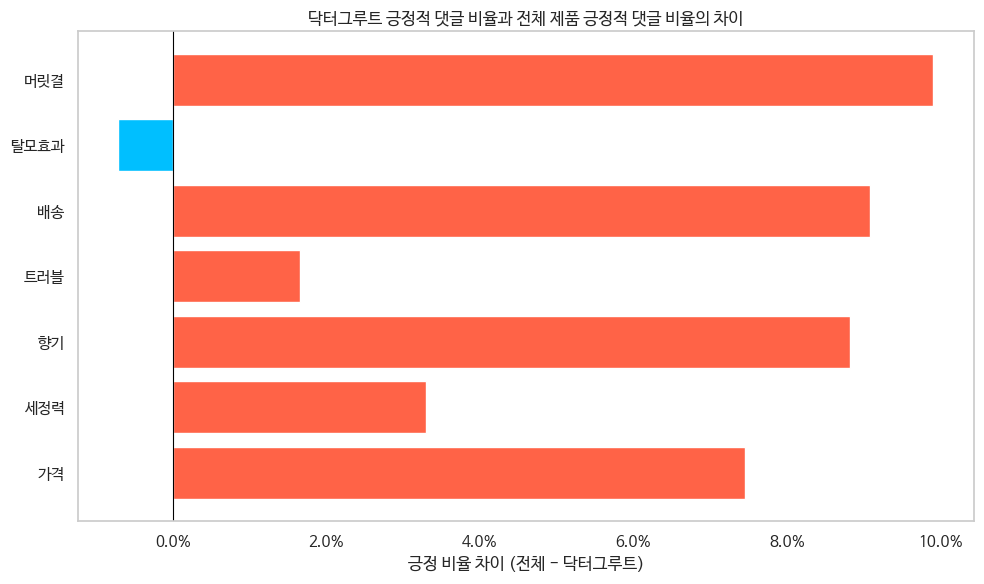

In [117]:
from matplotlib.ticker import PercentFormatter

topic = ['가격', '세정력', '향기', '트러블', '배송', '탈모효과', '머릿결']
all_positive_ratios = [0.902006, 0.953509, 0.954232, 0.932884, 0.920791, 0.941727, 0.907308]
groot_positive_ratios = [0.827469, 0.920556, 0.866019, 0.916342, 0.830042, 0.948821, 0.8083]


# Groot 긍정 비율을 기준으로 전체 긍정 비율과의 차이 계산
differences = [all - groot for all, groot in zip(all_positive_ratios, groot_positive_ratios)]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 차이에 따라 색상 설정
colors = ['tomato' if diff > 0 else 'deepskyblue' for diff in differences]

ax.barh(topics, differences, color=colors)

# 축 및 레이블 설정
ax.set_xlabel('긍정 비율 차이 (전체 - 닥터그루트)')
ax.set_title('닥터그루트 긍정적 댓글 비율과 전체 제품 긍정적 댓글 비율의 차이')

# 중앙 선 추가
ax.axvline(0, color='black', linewidth=0.8)

# 그리드 비활성화
ax.grid(False)

# X 축 레이블을 백분율로 설정
ax.xaxis.set_major_formatter(PercentFormatter(1))

plt.tight_layout()
plt.show()

In [91]:
닥터그루트[닥터그루트['머릿결*'] == 0]

,content,score,date,brand,가격,세정력/거품,향기,트러블/진정,배송/서비스/고객대응,탈모 효과 및 쿨링감,머릿결*
83130,머리가 너무 푸석해집니다....두세번 쓰고 도저히 못쓰겠어요..,1,22.09.10.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,0.0
83157,"이 샴푸가 유독 뻑뻑한 느낌이 있네요.평소에 기름기가 많아 컨디셔너,린스를 쓰지 않...",2,21.04.26.,닥터그루트,NaN,0.0,NaN,NaN,NaN,NaN,0.0
83158,쓰고나면 머리가 뻣뻣해져서 트리트먼트 무조건 써야해요머리가 덜 빠지고 하는건 잘 모...,2,20.12.22.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,0.0
83162,머리카락빠지는건 예전과 동일하고 더 푸석해진 머릿결에 가격비싸게 주고 샀는데 재구매...,2,22.08.24.,닥터그루트,1.0,NaN,NaN,NaN,NaN,0.0,0.0
83165,머리결이 점점 엉키고 엉망되네요,2,22.05.22.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
90459,너무 뻣뻣해여 ㅠㅠ. 왜이런거죠,5,22.07.26.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,0.0
90509,가격 너무 비싸요뻣뻣해요,5,22.04.09.,닥터그루트,0.0,NaN,NaN,NaN,NaN,NaN,0.0
90522,머리가 좀 푸석해지지만 이것만 쓰네요ㅔ,5,22.03.27.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,0.0
90554,지성용이라 그런지 부드러움이 덜했어요,5,22.01.24.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [119]:
닥터그루트['score'].value_counts()

5    5323
4    1810
3     372
1      66
2      31
Name: score, dtype: int64

In [120]:
라보에이치['score'].value_counts()


5    6118
4    1792
3     478
2      48
1      37
Name: score, dtype: int64

# kiwi로 형태소 나누기

In [92]:
pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=fdf354622907e0a89b1c73b1844580dd70cda5a1075422675256d9633cd96aa1
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


# 머릿결

In [93]:
import kiwipiepy
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
stopwords =  Stopwords()
kiwi = Kiwi()

In [96]:
comments_lst = []

comments = kiwi.tokenize(닥터그루트['content'][닥터그루트['배송/서비스/고객대응	'] == 0], stopwords=stopwords)

for tokens in tqdm(comments,total=닥터그루트['content'][닥터그루트['배송/서비스/고객대응	'] == 0].shape[0]):
    tokens = [t.form for t in tokens if t.tag in "VA" or t.tag in "XR" or t.tag in "NNP" or t.tag in "NNG"]
    comments_lst.append(tokens)

100%|██████████| 97/97 [00:00<00:00, 205.71it/s]


In [97]:
from collections import Counter
vocab_counter = Counter()

for sentence in comments_lst:
    vocab_counter.update(sentence)

print(vocab_counter)

Counter({'머리': 46, '좋': 36, '뻣뻣': 31, '사용': 31, '느낌': 29, '샴푸': 28, '머릿결': 19, '머리카락': 18, '정력': 17, '있': 16, '결': 15, '트리트먼트': 11, '후': 11, '탈모': 11, '뻣뻣하': 11, '거품': 11, '지성': 11, '향': 10, '제품': 10, '효과': 10, '뻑뻑': 8, '구매': 8, '린스': 7, '저': 7, '힘': 7, '괜찮': 7, '주문': 7, '두피': 7, '그렇': 6, '푸석': 5, '뻑뻑하': 5, '필수': 5, '만족': 5, '예전': 4, '정도': 4, '양': 4, '닥터': 4, '감': 4, '빳빳': 4, '기름지': 4, '기름': 3, '얇': 3, '남자': 3, '스킨': 3, '루트': 3, '생각': 3, '도움': 3, '모발': 3, '건조': 3, '많': 2, '가격': 2, '비싸': 2, '일주일': 2, '냄새': 2, '일반': 2, '심하': 2, '뻗뻗': 2, '강하': 2, '특성': 2, '불편': 2, '적당': 2, '전': 2, '가늘': 2, '시원': 2, '젊': 2, '단점': 2, '샴퓨': 2, '추천': 2, '풍성': 2, '뽀득뽀득': 2, '드라이': 2, '이거': 2, '깨끗': 2, '평소': 1, '컨디셔너': 1, '동일': 1, '엉망': 1, '바': 1, '카': 1, '락': 1, '원상태': 1, '볼륨': 1, '걸': 1, '향기': 1, '별': 1, '개인': 1, '취향': 1, '신랑': 1, '크': 1, '기존': 1, '다르': 1, '선택': 1, '방향': 1, '결과': 1, '실패': 1, '발': 1, '퍼석': 1, '석이': 1, '양도': 1, '감소': 1, '평범': 1, '문': 1, '뻐뻣': 1, '예정': 1, '특별': 1, '나쁘': 1, '쿨링감': 1, '얼마': 1, '며칠

# 배송

In [105]:
comments_lst = []

comments = kiwi.tokenize(닥터그루트['content'][닥터그루트['배송/서비스/고객대응'] == 0], stopwords=stopwords)

for tokens in tqdm(comments,total=닥터그루트['content'][닥터그루트['배송/서비스/고객대응'] == 0].shape[0]):
    tokens = [t.form for t in tokens if t.tag in "VA" or t.tag in "XR" or t.tag in "NNP" or t.tag in "NNG"]
    comments_lst.append(tokens)

100%|██████████| 241/241 [00:00<00:00, 379.37it/s]


In [106]:
from collections import Counter
vocab_counter = Counter()

for sentence in comments_lst:
    vocab_counter.update(sentence)

print(vocab_counter)

Counter({'배송': 160, '제품': 65, '좋': 62, '상품': 51, '샴푸': 49, '주문': 44, '포장': 44, '느리': 42, '구매': 36, '늦': 36, '사용': 31, '물건': 27, '만족': 25, '취소': 21, '판매자': 17, '박스': 17, '저': 15, '괜찮': 13, '신경': 12, '가격': 12, '택배': 12, '문제': 11, '구입': 11, '전': 11, '있': 11, '구형': 11, '탈모': 11, '배송비': 10, '펌프': 10, '뚜껑': 10, '작': 10, '그렇': 10, '요청': 9, '파손': 9, '사은품': 9, '상자': 9, '전화': 8, '발송': 8, '상태': 8, '반품': 8, '기분': 8, '먼지': 8, '효과': 8, '저렴하': 8, '케이스': 8, '송장': 7, '문의': 7, '도착': 7, '부분': 7, '연락': 7, '사진': 7, '성분': 7, '지급': 7, '어떻': 7, '여기': 6, '판매': 6, '뽁뽁이': 6, '지성': 6, '내용물': 6, '컵': 6, '신형': 6, '조심': 5, '빠르': 5, '일주일': 5, '문자': 5, '리뷰': 5, '뭐': 5, '귀찮': 5, '통': 5, '관리': 5, '이렇': 5, '용량': 5, '글': 5, '두피': 5, '확인': 5, '크': 5, '저렴': 5, '꼭지': 5, '이번': 5, '답': 4, '예정': 4, '머리': 4, '지연': 4, '고객': 4, '이상': 4, '네이버': 4, '정품': 4, '증정': 4, '닥터': 4, '모발': 4, '처음': 4, '답변': 4, '처리': 4, '안': 4, '세트': 4, '기대': 4, '샘플': 4, '필요': 4, '기간': 4, '선물': 4, '많': 4, '대응': 4, '유통': 4, '기한': 4, '향': 4, '나쁘': 4, '차이': 4, '

# 트러블

In [107]:
comments_lst = []

comments = kiwi.tokenize(닥터그루트['content'][닥터그루트['트러블/진정'] == 0], stopwords=stopwords)

for tokens in tqdm(comments,total=닥터그루트['content'][닥터그루트['트러블/진정'] == 0].shape[0]):
    tokens = [t.form for t in tokens if t.tag in "VA" or t.tag in "XR" or t.tag in "NNP" or t.tag in "NNG"]
    comments_lst.append(tokens)

100%|██████████| 43/43 [00:00<00:00, 1163.11it/s]


In [108]:
from collections import Counter
vocab_counter = Counter()

for sentence in comments_lst:
    vocab_counter.update(sentence)

print(vocab_counter)

Counter({'두피': 13, '머리': 12, '사용': 10, '좋': 9, '비듬': 8, '샴푸': 7, '저': 7, '제품': 5, '구입': 5, '건조': 5, '피': 5, '이거': 4, '후': 4, '향': 4, '구매': 4, '지성': 4, '증상': 4, '뾰루지': 3, '그렇': 3, '탈모': 3, '효과': 3, '자극': 2, '눈': 2, '여드름': 2, '가려움': 2, '모발': 2, '생각': 2, '가격': 2, '느낌': 2, '장점': 2, '요즘': 2, '있': 2, '각질': 2, '중단': 2, '지루': 2, '시큰': 1, '민감': 1, '약간': 1, '복합': 1, '젶무': 1, '감사': 1, '아이': 1, '한방': 1, '향기': 1, '여전': 1, '수': 1, '크': 1, '변화': 1, '여부': 1, '판단': 1, '대비': 1, '용': 1, '단점': 1, '쿨하': 1, '셋팅펌': 1, '매직': 1, '예민': 1, '체질': 1, '뿌리': 1, '힘': 1, '풍성': 1, '납작하': 1, '오후': 1, '무난': 1, '많': 1, '성분': 1, '중간': 1, '포기': 1, '가족': 1, '문제': 1, '닥터구르트': 1, '겨울': 1, '그르': 1, '새척력': 1, '괜찮': 1, '뭐': 1, '조금': 1, '개인': 1, '특성': 1, '호불호': 1, '관리': 1, '필요': 1, '상황': 1, '시작': 1, '가늘': 1, '기름': 1, '여전하': 1, '나쁘': 1, '처음': 1, '심각하': 1, '각종': 1, '명성': 1, '이상': 1, '완화': 1, '꾸준': 1, '삼푸': 1, '개선': 1, '전': 1, '묽': 1, '기름기': 1, '쫘아아악': 1, '머리카락': 1, '어떻': 1, '마트': 1, '부담': 1, '저렴': 1, '딸아이': 1, '질': 1, '심하': 1, '비싸':

# 향기


In [111]:
comments_lst = []

comments = kiwi.tokenize(닥터그루트['content'][닥터그루트['향기'] == 0], stopwords=stopwords)

for tokens in tqdm(comments,total=닥터그루트['content'][닥터그루트['향기'] == 0].shape[0]):
    tokens = [t.form for t in tokens if t.tag in "VA" or t.tag in "XR" or t.tag in "NNP" or t.tag in "NNG"]
    comments_lst.append(tokens)

100%|██████████| 69/69 [00:00<00:00, 560.33it/s]


In [112]:
from collections import Counter
vocab_counter = Counter()

for sentence in comments_lst:
    vocab_counter.update(sentence)

print(vocab_counter)

Counter({'향': 63, '좋': 32, '냄새': 20, '사용': 17, '샴푸': 12, '강하': 10, '효과': 9, '구매': 9, '향기': 9, '머리': 9, '남자': 9, '탈모': 9, '괜찮': 7, '거품': 7, '제품': 6, '스킨': 6, '두피': 6, '지성': 6, '모발': 5, '저': 5, '크': 5, '있': 5, '정도': 4, '느낌': 4, '추천': 4, '정력': 4, '만족': 4, '그렇': 4, '머리카락': 4, '후': 3, '개인': 3, '생각': 3, '여자': 3, '아들': 3, '남편': 3, '한방': 3, '별': 2, '뻣뻣': 2, '일반': 2, '심하': 2, '방향': 2, '이거': 2, '화장품': 2, '한약': 2, '배송': 2, '빠르': 2, '갈색': 2, '풍부하': 2, '개운하': 2, '호불호': 2, '사춘기': 2, '할아버지': 2, '예방': 2, '유분': 2, '세': 2, '세정': 2, '가늘': 1, '힘없': 1, '탄탄하': 1, '결과': 1, '기존': 1, '의향': 1, '일주일': 1, '양': 1, '취향': 1, '신랑': 1, '기능': 1, '삼퓨향': 1, '쎄요': 1, '흔하': 1, '요즘': 1, '시원': 1, '머스크': 1, '거북': 1, '시원하': 1, '아저씨': 1, '글코': 1, '울': 1, '집': 1, '고약하': 1, '멘토': 1, '화이트': 1, '컵': 1, '블랙': 1, '적당': 1, '나쁘': 1, '향보': 1, '기대': 1, '끝': 1, '포장': 1, '맘': 1, '내용물': 1, '케이스': 1, '색상': 1, '굵': 1, '얇': 1, '계속': 1, '향긋': 1, '적응': 1, '상품': 1, '부분': 1, '후기': 1, '평가': 1, '리뷰': 1, '예전': 1, '샴퓨들': 1, '적': 1, '샴퓨': 1, '머릿결': 1, 

# 가격


In [115]:
comments_lst = []

comments = kiwi.tokenize(닥터그루트['content'][닥터그루트['가격'] == 0], stopwords=stopwords)

for tokens in tqdm(comments,total=닥터그루트['content'][닥터그루트['가격'] == 0].shape[0]):
    tokens = [t.form for t in tokens if t.tag in "VA" or t.tag in "XR" or t.tag in "NNP" or t.tag in "NNG"]
    comments_lst.append(tokens)

100%|██████████| 152/152 [00:00<00:00, 199.24it/s]


In [116]:
from collections import Counter
vocab_counter = Counter()

for sentence in comments_lst:
    vocab_counter.update(sentence)

print(vocab_counter)

Counter({'비싸': 98, '가격': 88, '좋': 71, '사용': 32, '탈모': 31, '샴푸': 29, '구매': 28, '제품': 26, '효과': 20, '향': 18, '만족': 16, '저렴하': 13, '있': 13, '머리카락': 12, '괜찮': 12, '머리': 11, '닥터': 11, '지성': 10, '느낌': 9, '루트': 8, '배송': 7, '상품': 6, '양': 6, '두피': 6, '싸': 5, '정도': 5, '후': 5, '그렇': 5, '모발': 5, '많': 5, '단점': 5, '주문': 5, '정력': 5, '남편': 4, '예방': 4, '냄새': 4, '적': 4, '거품': 4, '도움': 4, '고민': 4, '가격대': 4, '힘': 4, '구입': 4, '크': 4, '아들': 4, '이번': 4, '저렴': 4, '생각': 3, '앞': 3, '고급': 3, '예정': 3, '감': 3, '별': 3, '나쁘': 3, '향기': 3, '사악': 3, '용량': 3, '집': 3, '빠르': 3, '처음': 3, '마트': 3, '행사': 3, '무난': 3, '이거': 3, '애용': 3, '기름': 3, '판매자': 2, '네이버': 2, '반품': 2, '문제': 2, '사진': 2, '뭐': 2, '박스': 2, '한방': 2, '보통': 2, '달': 2, '후기': 2, '여기': 2, '전': 2, '평': 2, '저': 2, '샘플': 2, '감사': 2, '일반': 2, '기한': 2, '할인': 2, '질': 2, '필요': 2, '잘나': 2, '차이': 2, '선물': 2, '그루트': 2, '최고': 2, '하루': 2, '이것': 2, '흠': 2, '품질': 2, '추천': 2, '방향': 2, '심하': 2, '컵': 2, '광고': 2, '방지': 2, '색': 2, '꽁짜': 2, '금액': 2, '대비': 2, '의사': 2, '괜': 2, '비듬': 2, 